In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm # Importe tqdm se ainda não estiver importado

In [20]:
a_val = 1.0  # Comprimento da placa (m)
b_val = 1.0  # Largura da placa (m)
T1_val = 24.0  # Temperatura T1 (°C)
N_terms = 60  # Número de termos na série

In [21]:
x_points = np.linspace(0, a_val, 500)
y_points = np.linspace(0, b_val, 500) 
X_grid, Y_grid = np.meshgrid(x_points, y_points)

In [22]:
# --- Valores de A para testar ---
valores_A = [10, 25, 50, 100, 200, 500]

Calculando distribuição para A = 10°C/m


  0%|          | 0/60 [00:00<?, ?it/s]

Calculando distribuição para A = 25°C/m


Calculando distribuição para A = 50°C/m


Calculando distribuição para A = 100°C/m


Calculando distribuição para A = 200°C/m


Calculando distribuição para A = 500°C/m


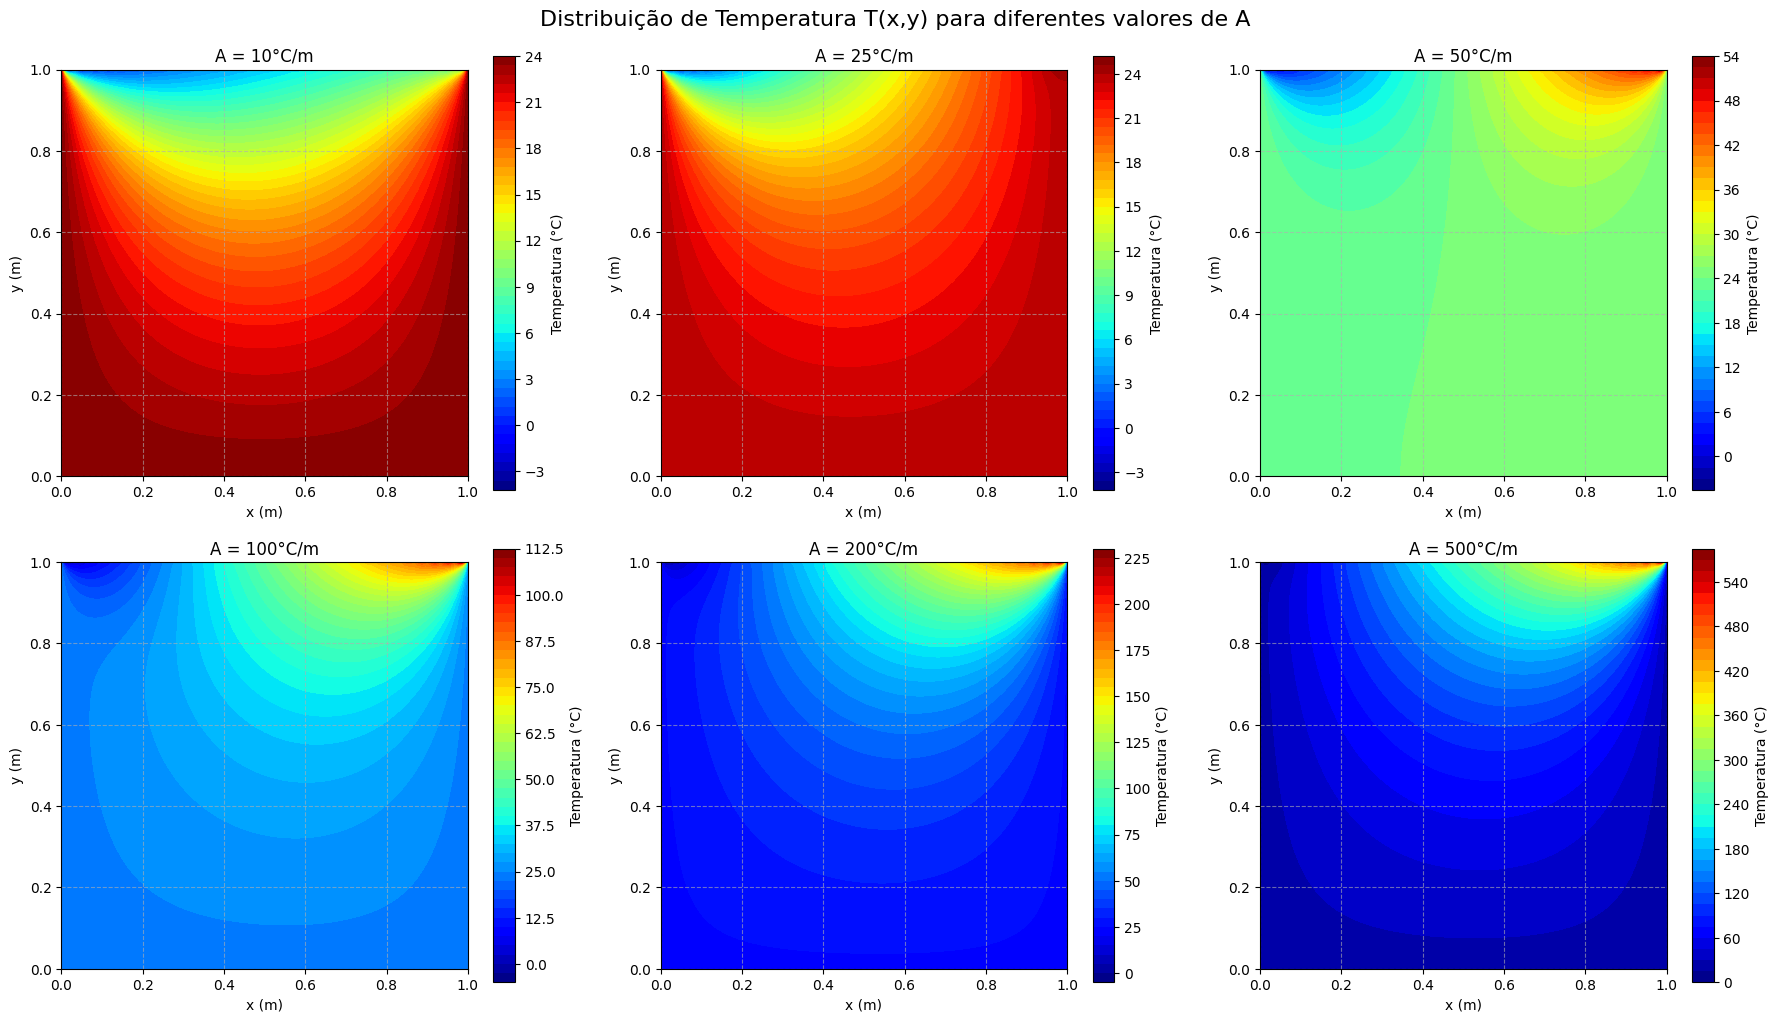

In [23]:
# --- Configuração dos subplots ---
n_plots = len(valores_A)
n_cols = 3  # Exibe 3 gráficos por linha
n_rows = (n_plots + n_cols - 1) // n_cols # Calcula o número de linhas necessário

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Ajuste o figsize
axes = axes.flatten() # Achata a matriz de axes para facilitar a iteração

# Loop sobre cada valor de A
for i, A_current_val in enumerate(valores_A):
    print(f"Calculando distribuição para A = {A_current_val}°C/m")

    # Inicializa a matriz de temperatura com T1
    T_series_sum = np.zeros(X_grid.shape)

    # Cálculo da soma da série (adaptação do seu loop original)
    # Usamos A_current_val no lugar de A_val
    for n in tqdm(range(1, N_terms + 1), leave=False):
        term_Aa_factor = A_current_val * a_val * ((-1)**(n + 1))
        term_T1_factor = T1_val * (1 - ((-1)**n))

        numerator_factor_for_Bn = term_Aa_factor - term_T1_factor

        common_arg_factor = n * np.pi / a_val
        sinh_denominator_term = np.sinh(common_arg_factor * b_val)

        if sinh_denominator_term == 0:
            Bn = 0.0
        else:
            Bn = (2 * numerator_factor_for_Bn) / (n * np.pi * sinh_denominator_term)

        sin_term = np.sin(common_arg_factor * X_grid)
        sinh_term_grid = np.sinh(common_arg_factor * Y_grid)

        T_series_sum += Bn * sin_term * sinh_term_grid

    T_grid = T1_val + T_series_sum

    # --- Plotagem do resultado para o A_current_val ---
    ax = axes[i]
    contour = ax.contourf(X_grid, Y_grid, T_grid, levels=50, cmap=cm.jet) # Usando cm.jet como no seu original
    fig.colorbar(contour, ax=ax, label='Temperatura (°C)')
    ax.set_title(f'A = {A_current_val}°C/m')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, linestyle='--', alpha=0.6)
   
# Remove subplots vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.suptitle('Distribuição de Temperatura T(x,y) para diferentes valores de A', y=1.02, fontsize=16) # Título geral
plt.show()